# Notebook to create figure1

In [1]:
import pandas as pd
import matplotlib

## Data source

Original data source is from the COVID-19 Repository of the Johns Hopkins University:

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

We have downloaded that file and added it to this repository for better future reproducibility of the figure in its current state.

To attempt to update the figure with the more current data, you can run this command (on a system where `wget` is available):

```
wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
```

## Data processing 

In [2]:
# read the raw data into a pandas DataFrame object
df = pd.read_csv("time_series_covid19_deaths_global.csv", index_col=1)

We show the beginning of the table:

In [3]:
df.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/27/22,3/28/22,3/29/22,3/30/22,3/31/22,4/1/22,4/2/22,4/3/22,4/4/22,4/5/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,7662,7663,7665,7667,7670,7670,7671,7671,7671,7671
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,3491,3491,3492,3492,3492,3492,3492,3492,3492,3492
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,6873,6873,6874,6874,6874,6874,6874,6874,6874,6874
Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


Each row shows a different Country (or region: some are subdivided into Provinces/States), and each column data for a different day. The data shows the (cumulative) number of COVID19 deaths for each country.

In [4]:
# drop information regarding latitude and Longitude, and also Province/State as we cannot sum them
df.drop(['Lat', 'Long'], axis=1, inplace=True)
df.drop(['Province/State'], axis=1, inplace=True)

In [5]:
# Sum the number of deaths across all countries, so we get a 
# time series of total cumulative COVID19 deaths with one data entry each day
total = df.sum()

# interpret the string with the date as a date data type
total.index = pd.to_datetime(total.index, format="%m/%d/%y")

# Compute the deaths per day
deaths_per_day = total.diff()

We have extract the data we are interested in: new COVID19 deaths per day. Let's look at the first 20 days:

In [6]:
deaths_per_day.head(20)

2020-01-22      NaN
2020-01-23      1.0
2020-01-24      8.0
2020-01-25     16.0
2020-01-26     14.0
2020-01-27     26.0
2020-01-28     49.0
2020-01-29      2.0
2020-01-30     38.0
2020-01-31     42.0
2020-02-01     46.0
2020-02-02    103.0
2020-02-03     64.0
2020-02-04     66.0
2020-02-05     72.0
2020-02-06     70.0
2020-02-07     85.0
2020-02-08     87.0
2020-02-09    100.0
2020-02-10    107.0
dtype: float64

## Data analysis and figure creation

<Axes: >

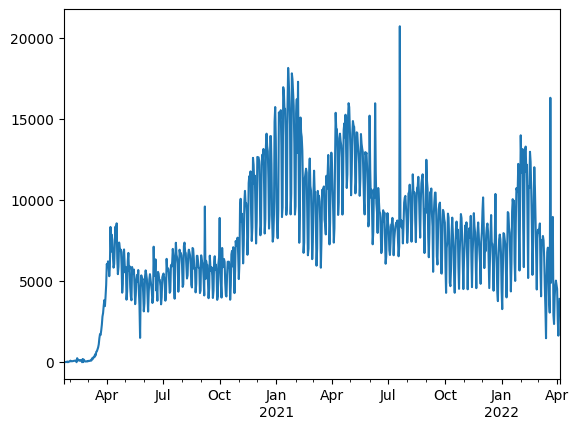

In [7]:
deaths_per_day.plot()

<Axes: >

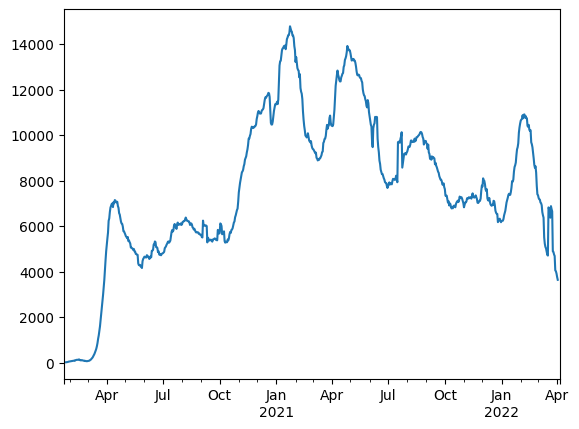

In [8]:
# Compute a 7-day Rolling Average to reduce (presumably) weekly oscillations
deaths_per_day_ra = deaths_per_day.rolling(7, center=True, win_type=None).mean()

deaths_per_day_ra.plot()

## Create publication plot (`figure1.pdf`)

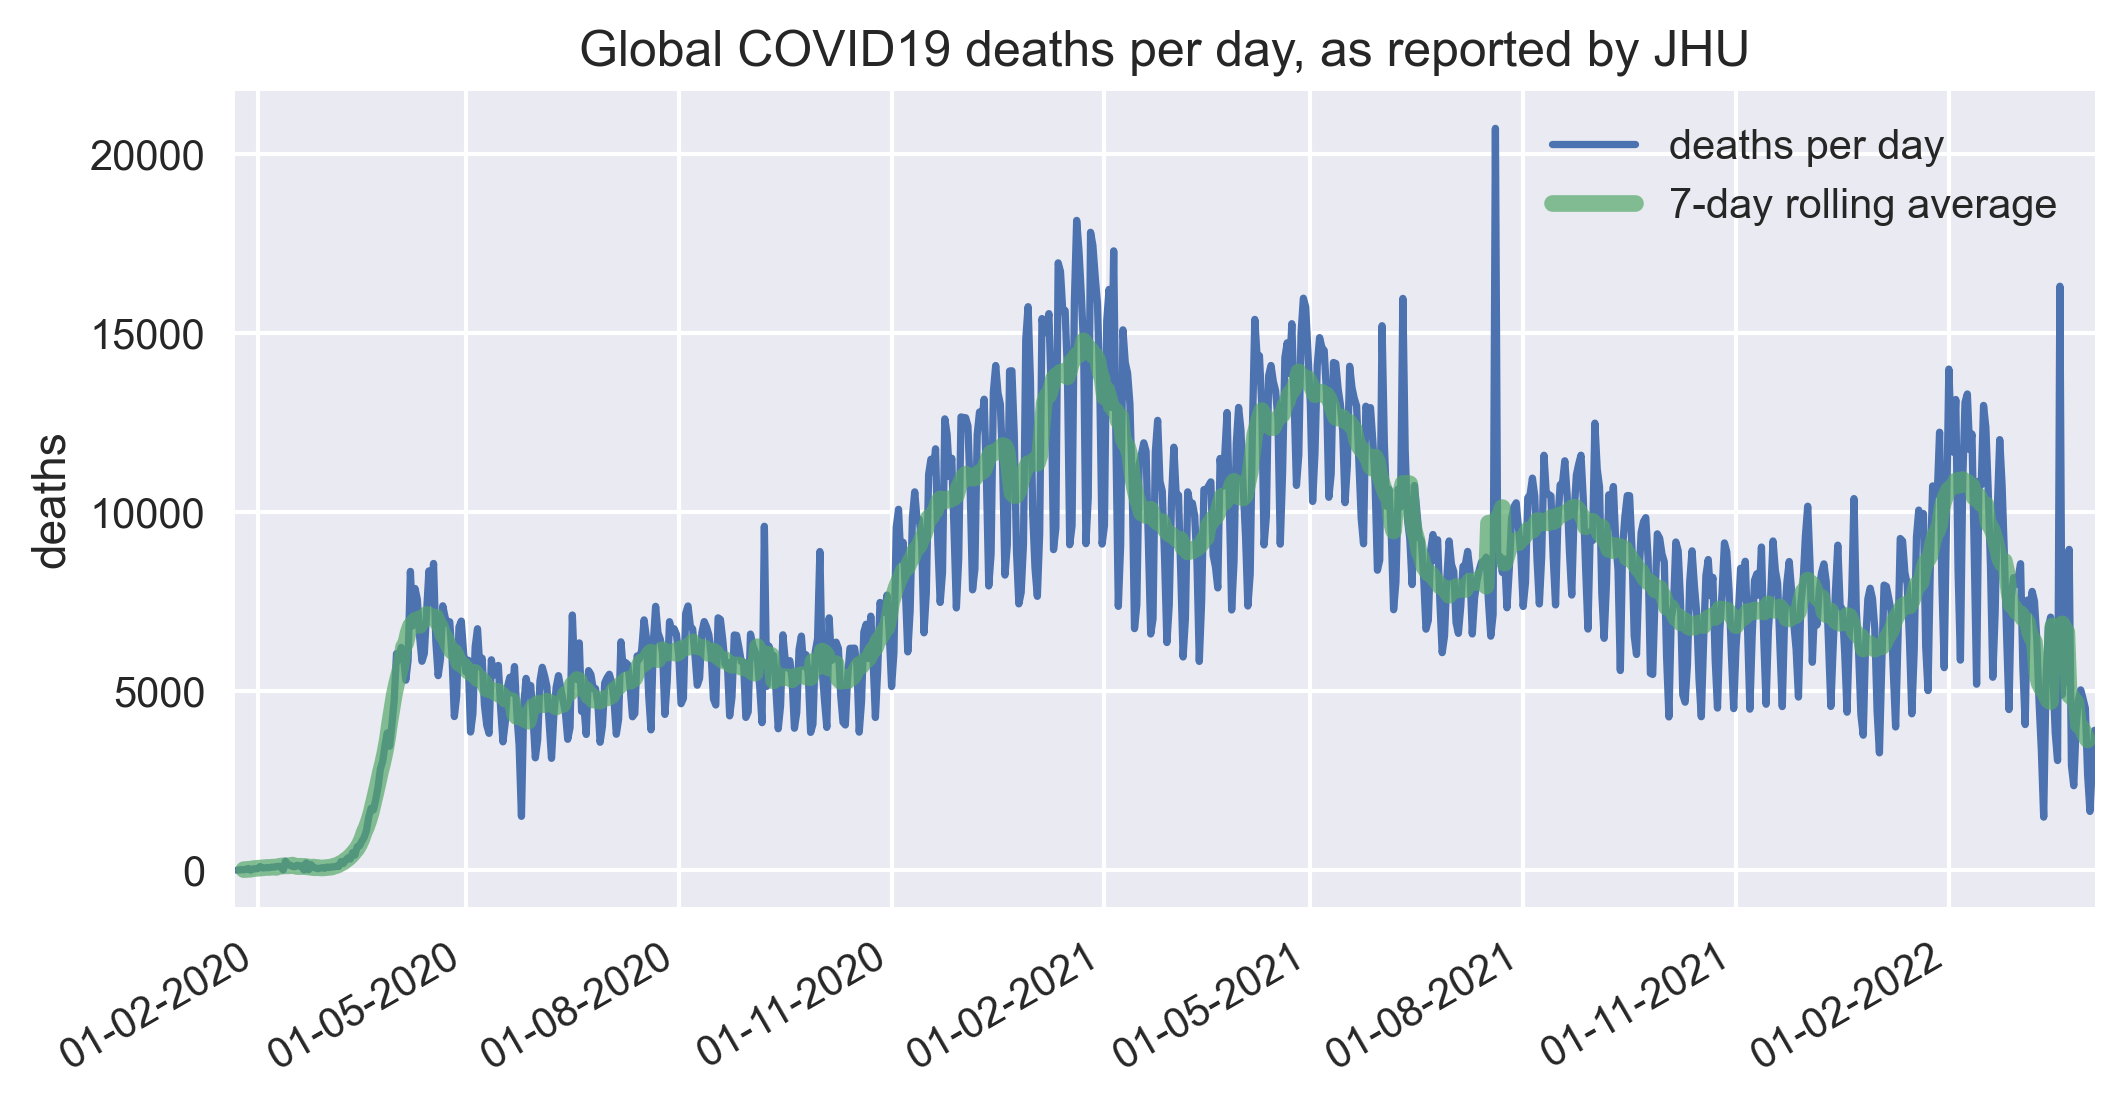

In [9]:
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import matplotlib
matplotlib.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(8, 4))
fig.set_dpi(300)

# plot the data
deaths_per_day.plot(ax=ax, label='deaths per day')
deaths_per_day_ra.plot(ax=ax, linewidth=4, alpha=0.7, label='7-day rolling average')

# x-axis formatting: set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# x-axis formatting: set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
fig.autofmt_xdate()

ax.grid(True)
ax.set_title("Global COVID19 deaths per day, as reported by JHU")
ax.set_ylabel("deaths")

ax.legend()

# save figure for publication
fig.savefig("figure1.pdf")


## Software versions used

In [10]:
# python version
import sys
sys.version

'3.13.7 | packaged by conda-forge | (main, Sep  3 2025, 14:24:46) [Clang 19.1.7 ]'

In [11]:
pd.__version__  # pandas version

'2.3.2'

In [12]:
matplotlib.__version__

'3.10.6'

## Last executed (UTC)

In [13]:
import datetime
datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

'2025-09-24 12:05:50'